In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

In [ ]:
# Load dataset
df = pd.read_csv('fire_incident.csv')
df.columns = [c.strip() for c in df.columns]

In [ ]:
df.head()

Date  Year   Time Day_of_Week               Barangay   Latitude  \
0  18/11/2021  2021  18:10    Thursday     I-C (Bagong Bayan)  14.076365   
1  23/02/2023  2023  19:54    Thursday   Santa Veronica (Bae)  14.068024   
2  01/09/2021  2021   1:12   Wednesday           I-A (Sambat)  14.072499   
3  16/08/2022  2022   2:10     Tuesday        VI-A (Mavenida)  14.072298   
4  10/12/2024  2024  15:42     Tuesday  San Lucas 2 (Malinaw)  14.063669   

    Longitude Weather Property_Type  Fire_Cause         Fire_Type  \
0  121.310982   Sunny   Residential     Natural        Grass Fire   
1  121.320271   Rainy   Residential     Cooking  Residential Fire   
2  121.316021   Sunny   Residential  Electrical   Electrical Fire   
3  121.330864  Stormy   Residential       Other        Other Fire   
4  121.320900  Cloudy   Residential     Cooking  Residential Fire   

  Fire_Severity  Casualty_Count  Response_Time  Fire_Duration  
0        Medium               7              6             55  
1          High               7             12             15  
2        Medium               2             11             41  
3        Medium               1             14            170  
4          High              11              9             64

In [ ]:
df.columns

Index(['Date', 'Year', 'Time', 'Day_of_Week', 'Barangay', 'Latitude',
       'Longitude', 'Weather', 'Property_Type', 'Fire_Cause', 'Fire_Type',
       'Fire_Severity', 'Casualty_Count', 'Response_Time', 'Fire_Duration'],
      dtype='object')

In [ ]:
df.shape

(1000, 15)

In [ ]:
# Define features and target
X = df[['Year', 'Barangay', 'Fire_Type', 'Fire_Cause']]
y = df['Casualty_Count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Barangay', 'Fire_Type', 'Fire_Cause'])
    ]
)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Barangay', 'Fire_Type', 'Fire_Cause'])
    ]
)

In [ ]:
# SVM pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, probability=True, random_state=42))
])

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Train model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Barangay', 'Fire_Type',
                                                   'Fire_Cause'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [ ]:
# Make predictions
y_pred = pipe.predict(X_test)

In [ ]:
print("=== SVM - Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

=== SVM - Classification Report ===
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        84
           1     0.7191    0.9954    0.8350       216

    accuracy                         0.7167       300
   macro avg     0.3595    0.4977    0.4175       300
weighted avg     0.5177    0.7167    0.6012       300



=== SVM - Confusion Matrix ===
[[  0  84]
 [  1 215]]


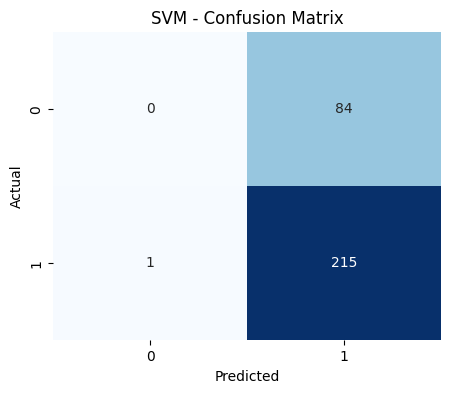

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=== SVM - Confusion Matrix ===")
print(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== SVM - ROC AUC: 0.5209 ===


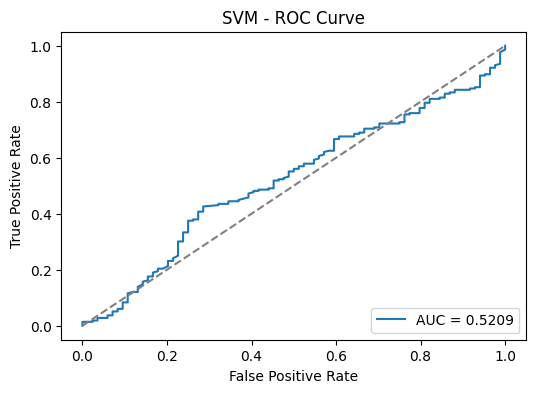

In [ ]:
# ROC Curve
y_proba = pipe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"=== SVM - ROC AUC: {roc_auc:.4f} ===")
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save model
joblib.dump(pipe, "fire_predictor_svm.pkl")
print("Saved model to fire_predictor_svm.pkl")

Saved model to fire_predictor_svm.pkl
